---
# <div align="center"><font color='red'>  </font></div>
# <div align="center"><font color='red'> COSC 2779/2972 | Deep Learning  </font></div>
## <div align="center"> <font color='red'> Week 1 Lectorial Example: **Machine Learninig Basics**</font></div>
---

**Disclaimer:** The code is done quickly to demonstrate some important concepts in Machine Learning and, should not be considered as an adequate approach to solve the tasks mentioned.

# Problem Statement

In this example we will look into classifying images of hand writtend digits. An example from the dataset we are working with is given below:  
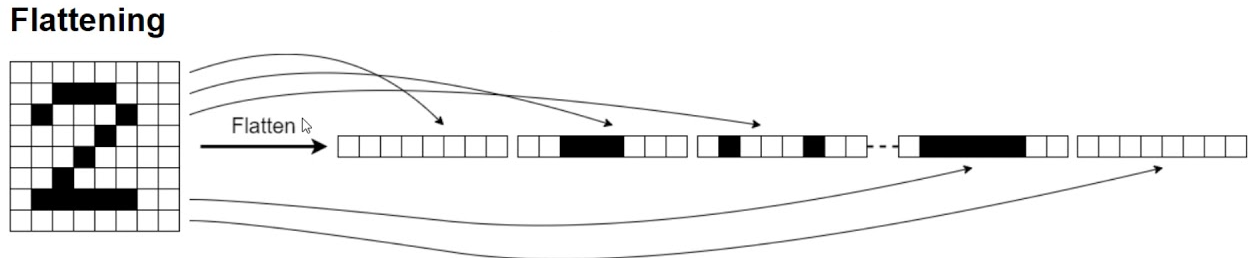


The digits dataset consists of 8x8 pixel images of digits. 
The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,).

Sklearn has already done this for us and the data is available in sklearn datasets.

The task we are interested in is: Given the pixel intensities (64 dimensional attribute vector) predict what digit(0 to 9) the image represent.


# Machine Learning - Definition

Tom Mitchell (1998)

"A computer program is said to learn:
- Some class of tasks T
- From experience E, and
- Performance measure P

If its performance at tasks in T, as measured by P,
improves with experience E”.



# Task

The Task can be expressed an unknown target function:

\\( y = f(x)\\) \\

- Attributes (Features) of the task: \\( x \in \mathbb{R}^d\\)
- Unknown target function: \\( f(\cdot) \\)
- output of the function (target): \\( y\\) 

In the problem above, \\(x\\) is a 64 dimentional vector and \\(y \\) is a category that is 0-9.

In ML we try to approximate the unknown target function by with a hypothesis

\\( \hat{y} = h^\ast(x) \approx f(x)\\)

The hypothesis \\( h^\ast(\cdot)\\) is selected from a hypothesis space determined by the learning algorithm. 

# Experience

The Experience is typically a data set. For superviced learning the data comes as a tuple \\( x, y\\).

In this example the data is given as:
- x: each data point is a 64 dimentional vector.
- y: a categorical variable that takes values in the range 0-9.

Lets explore the data that is goven for this problem.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

Lets visualise some data. As data are images 

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,5))
plt.gray() 
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i]) 
    plt.xticks([])
    plt.yticks([])
    plt.title(['Class = ', str(digits.target[i])])
plt.show() 

Lets put the data to a dataframe. This is optional - we can directly work with the data from the sklearn dataset if needed. 

In [ ]:
data = pd.DataFrame(data=digits.data, columns=["pixel_"+ str(i+1) for i in range(0,64)] )
data['class'] = digits.target
data.head()

Lets now examine the target.

In [ ]:
plt.hist(data['class'] ,alpha=0.3, color='b', density=True)
plt.show()

**What do you observe?**

Lets do some visualisation of the pixel intensities according to the class

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
i=1
for col in data.columns:
  
  if col != 'class':
    plt.subplot(8,8,i)
    sns.boxplot(x='class',y=col,data=data)
    i = i+1
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

**What do you observe?**

# Performance Measure
**What does success look like?** To evaluate the abilities of a machine learning
algorithm, we must design quantitative measure of its performance. 

We would like to know:
\\( h^\ast(x) \approx f(x)\\)

**Cannot measure this, dont know \\(f(x)\\)**

What can we do?

Measure **how well the hypothesis matches the experience (data)**


## Setting up the performance (evaluation) metric

Based on the above observations and the description of the task, what do you think is a **good performance measure for this task?**

There are many performance metrics that apply to this problem such as `accuracy_score`, `f1_score`, etc. More information on performance metrics available in sklearn can be found at: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

However as the most **intuitive** out of these `accuracy_score` can be applied to this problem lets stick with it (if the classes are not balanced, then we have to go for another metric). 

What is the **target value**: In literature we can see that other people have achieved around **99% accuracy** in similar tasks. Therefore lets set out goal at that.




# Evaluating Hypotheses 

Usually we are interested in how well the machine learning algorithm
performs when deployed in the real world - unseen data. We therefore
evaluate these performance measures using a test set of data that is separate
from the data used for training the machine learning system.


The central challenge in machine learning is that our
algorithm must perform well on new, previously unseen
inputs (not just those on which our model was trained).
The ability to perform well on previously unseen inputs is
called **generalization**.

- Generalization error is related to the true error of a
hypothesis (cannot be measured).
- The generalization error of a machine learning model
is typically estimated by measuring its performance
on a test set collected separately from the training
set.

**How can we affect performance on the test set when we can observe
only the training set?**

If the training and the test set are collected arbitrarily, there is indeed little we can do. 

However, If we are allowed to make some assumptions about how the training
and test set are collected, then we can use the field of statistical learning
theory to obtain some answers.

Assumptions about the data-generating process:
- Each dataset are independent from each other.
- Training set and test set are identically distributed. We call that shared
underlying distribution the data-generating distribution \\(p_{data}\\).

Practically, We can generate "simulated" unseen data in several methods
1. Hold-Out validation
2. Cross-Validation


Lets look at how Hold-Out validation is done


## Hold-out Validation

In hold out validation we divide the data into 3 subsets:
1. Training: to obtaining the parameters or the weights of the hypothesis
2. Validation: for tuning hyper-parameters and model selection.
3. To evaluate the performance of the developed model. DO NOT use this split to set or tune ant element of the model.

For this example lets divide the data into 60/20/20

In [ ]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_data_, test_data = train_test_split(data, test_size=0.2, shuffle=True,random_state=0)
    
with pd.option_context('mode.chained_assignment', None):
    train_data, val_data = train_test_split(train_data_, test_size=0.25, shuffle=True,random_state=0)
    
print(train_data.shape[0], val_data.shape[0], test_data.shape[0])

In [ ]:
train_X = train_data.drop(['class',], axis=1).to_numpy()
train_y = train_data[['class']].to_numpy()

test_X = test_data.drop(['class',], axis=1).to_numpy()
test_y = test_data[['class']].to_numpy()

val_X = val_data.drop(['class',], axis=1).to_numpy()
val_y = val_data[['class']].to_numpy()

We know the values for the features are between 0-16 (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Lets scale them to 0-1 range

In [ ]:
train_X = train_X/16.0
test_X = test_X/16.0
val_X = val_X/16.0

setup a function to print train/val accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

def print_accuracy_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_acc = accuracy_score(train_y, train_pred)
    val_acc = accuracy_score(val_y, val_pred)
    
    print("Train Accuracy score: {:.3f}".format(train_acc))
    print("Validation Accuracy score: {:.3f}".format(val_acc))

# Hypothesis space

The hypothesis space determined by the learning algorithm.
- Linier regression: contains all the linier combinations of data.
- Decision tree: all the possible trees with two branches.
- Logistic regression: all the possible \\(d-1\\) hyperplanes.

How to select the best hypothesis space (learning algorithm)?

This is a million doller question in ML. There is no direct answer. You need to use your knowladge about the **task** and **data** to narrow down suitable options. Then use evaluation techniques to pick the best one. 

## Baseline model

We need to select a baseline mode to do this task. I am going to select linear logistic regression for this example.

*There are better models than this, however lets go with this option for now.*



In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000).fit(train_X, train_y.ravel())

print_accuracy_scores(clf, train_X, train_y, val_X, val_y)



**Note:** 
 - The fit function search the hypothesis space for the best hypothesis according to the loss (cost) function. loss (cost) function is related to the performace measure we selected above but does not have to be the same. Sometines the loss need to adheare to some conditions so that the search becomes tractable. 
 - We have posed the ML problem as a optimisation (search) problem.

**How do we know if the base model is good?**

The factors determining how well a machine learning algorithm will perform are
its ability to
- Make the training error small.
- Make the gap between training and test error small (generalization)

For this task the baseline model achieved good performance. However we can see a gap between the Train Accuracy and the Validation Accuracy (generalisation GAP). 


Two main challenges in machine learning:
- **Under-fitting**: Both training and test error is large. The model does not
have enough capacity to capture the target function.
- **Over-fitting**: Test error is large but the training error is small (large gap). Learning vs. memorizing.

We can control whether a model is more likely to over-fit or under-fit by altering its capacity.


# Model capacity

How can we control model capacity?
- One way to control the capacity of a learning algorithm is by choosing its hypothesis space: simpler hypothesis space, less capacity.
- Another is regulerisation.

**Regularization** is any modification made to a learning
algorithm that is intended to reduce its generalization error
but not its training error.

we can regulerize a model by adding a penalty to the loss function. The penalty capture our beliefs about the prefered hypothesis. One example is weight decay. This captures our belief that *we prefere hypothesis with smaller weights than once with large weights*. 

In this case the loss function becomes:

\\(\mathcal{L} = \text{data-term} + \lambda \times \text{regulerization-term}\\)

When applying regularisation we need to select the lambda value. For this we can use
1. Grid search
2. Random search


We will do grid search in this example.

In [ ]:
lambda_paras = np.logspace(-5, 1, num=100)    # establish the lambda values to test (grid)

# Then search
train_performace = list()
valid_performace = list()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, random_state=0, solver='liblinear', max_iter=1000).fit(train_X, train_y.ravel())
    
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_acc = accuracy_score(train_y, train_pred)
    val_acc = accuracy_score(val_y, val_pred)
    
    train_performace.append(train_acc)
    valid_performace.append(val_acc)

Lets plot the results. When plotting I have made some changes to the values to get an image that looks like the one that is in the lecture slides. This is optional, you can plot the original numbers. 

In [ ]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], [1.0 - tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], [1.0 - vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

**What lambda value would you use? why?**

In [ ]:
clf = LogisticRegression(penalty='l2', C = 10.0, random_state=0, solver='liblinear', max_iter=1000).fit(train_X, train_y.ravel())
print_accuracy_scores(clf, train_X, train_y, val_X, val_y)

Is there still a GAP between training and validation. Why is this?

Lets try to see what features are important to the classifier we have selected. Instead of using bar graphs as last week. lets present the feature importance as an image. This shows that you need to do output visualisations according to the problem. 

In [ ]:
plt.figure(figsize=(15,5))
plt.gray() 
for i in range(10):
    plt.subplot(2,5,i+1)
    coef = clf.coef_[i]
    coef = coef.reshape((8,8))
    plt.imshow(coef) 
    plt.xticks([])
    plt.yticks([])
    plt.title(['Class = ', str(digits.target[i])])
plt.show() 

In [ ]:
# # for 0 class vs 8
# plt.figure(figsize=(15,5))
# plt.gray() 
# for i in range(1):
#     plt.subplot(2,5,i+1)
#     coef = clf.coef_[i]
#     coef = coef.reshape((8,8))
#     plt.imshow(coef) 
#     plt.xticks([])
#     plt.yticks([])
#     plt.title(['Class = ', str(digits.target[i])])
# plt.show() 

# Extra
Some additional content 



## Other Performance Metrics

We can also use other performance metrics to evaluate out model at this stage

classification report is a very useful tool.

In [ ]:
from sklearn.metrics import classification_report

test_pred = clf.predict(test_X)
    
print(classification_report(test_y, test_pred, target_names=[str(i) for i in range(0,10)]))

Another useful tool is the confusion matrix plots

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, test_X, test_y,
                                 display_labels=[str(i) for i in range(0,10)],
                                 cmap=plt.cm.Blues)
plt.show()

## Cross-validation


Cross-validation (CV) is the second technique we can use to generate simulated unseen data. Lets see how this is done.

Again we need to separate some test data - for final evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True,random_state=0)
    
print(train_data.shape[0], test_data.shape[0])

In [ ]:
train_X = train_data.drop(['class',], axis=1).to_numpy()
train_y = train_data[['class']].to_numpy()

test_X = test_data.drop(['class',], axis=1).to_numpy()
test_y = test_data[['class']].to_numpy()

Now lets see how CV is done for a given lambda value. The advantage would be that the CV performance metric value would be using the entire training set (not just some portion of it).  

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
score_hold_val = list()
score_hold_train = list()
for train_idx, val_idx in kf.split(train_X):
    train_x_split = train_X[train_idx,:]
    train_y_split = train_y[train_idx,:]
    val_x_split = train_X[val_idx,:]
    val_y_split = train_y[val_idx,:]
    
    clf = LogisticRegression(penalty='l2', C = 10, random_state=0, solver='liblinear', max_iter=1000, class_weight='balanced').fit(train_x_split, train_y_split.ravel())
    
    train_pred = clf.predict(train_x_split)
    val_pred = clf.predict(val_x_split)
    
    train_acc = accuracy_score(train_y_split, train_pred)
    val_acc = accuracy_score(val_y_split, val_pred)
    
    score_hold_train.append(train_acc)
    score_hold_val.append(val_acc)
    
print('Cross validation Accuracy: ' + str(np.mean(score_hold_val)))

Now to tune the hyper parameter lambda, we need to run the above code for several lambdas and get the best value (Grid search). 

Running the above is not very convenient. SK-learn has made this easy for us by including a function to do CV. More information on CV with sklearn can be found at: https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

accuracy_scorer = make_scorer(accuracy_score)
lambda_paras = np.logspace(-5, 4, num=10)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l1', C = 1.0/lambda_para, solver='liblinear', max_iter=1000)
    scores = cross_validate(clf, train_X, train_y.ravel(), scoring=accuracy_scorer, return_estimator=True,return_train_score=True, cv=10)
    
    cv_results[lambda_para] = scores

Lets plot the results

In [ ]:
fig, ax = plt.subplots()

val_means = [1 - np.mean(cv_results[lambda_para]['test_score']) for lambda_para in lambda_paras]
val_std = [np.std(cv_results[lambda_para]['test_score']) for lambda_para in lambda_paras]

train_means = [1 - np.mean(cv_results[lambda_para]['train_score']) for lambda_para in lambda_paras]
train_std = [np.std(cv_results[lambda_para]['train_score']) for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

Now that we know the lambda value, how can we get the model?

One way to do this is to pick the classifier that is closest to the mean performance from the best lambda value. 

In [ ]:
best_lambda = 0.1    # best lambda according to the above figure

# get the split that has the closest performance value to the mean performance
best_classifier_inx = np.argmin(np.abs(cv_results[0.1]['test_score'] - np.mean(cv_results[0.1]['test_score'])))

clf = cv_results[0.1]['estimator'][best_classifier_inx]

Lets plot the test accuracy

In [ ]:
test_pred = clf.predict(test_X)
    
print(classification_report(test_y, test_pred, target_names=[str(i) for i in range(0,10)]))